# Variational Autoencoder 

Autoencoder (AE) is a method to map high-dimensional signal into lower-dimensional latent space [1]. However, regarding signal creation, it is not strightforward to sample a low-dimensional signal from latent space and generate a high-dimensional signal that follows the distribution of training data. In AE the compressed signal in latent space can be any distribution, and should be hard to estimate [2]. Different from AE, variatoinal autoencoder (VAE) restricts the latent representation as a Guassian distribution [3].  

## Evidence Lower Bound 


The Evidence Lower Bound (ELBO) is a concept primarily used in the context of variational inference, a method for approximating complex probability distributions. In probabilistic modeling, we often want to infer the posterior distribution of latent variables given observed data. However, calculating the true posterior distribution is often unfeasible. Variational inference approximates the posterior distribution with a simpler distribution chosen from a parameterized function, such as a Gaussian distribution. 

The ELBO serves as a lower bound for the log marginal likelihood of the data. By maximizing the ELBO with respect to the parameters of the approximate posterior distribution, we indirectly maximize the log marginal likelihood. This is because the ELBO is derived from the Kullback-Leibler (KL) divergence between the approximate posterior and the true posterior, and maximizing the ELBO minimizes this divergence.

## Marginal Likelihood 

In [5]:
import numpy as np
import random
import torch 
import torch.nn as nn 
import torch.optim as optim
from torch.utils.data import DataLoader 
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

datapath = r'C:\Users\User\Documents\repos\data'

In [6]:
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(datapath, train=True, transform=transform, download=False)
test_dataset = datasets.MNIST(datapath, train=False, transform=transform, download=False)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

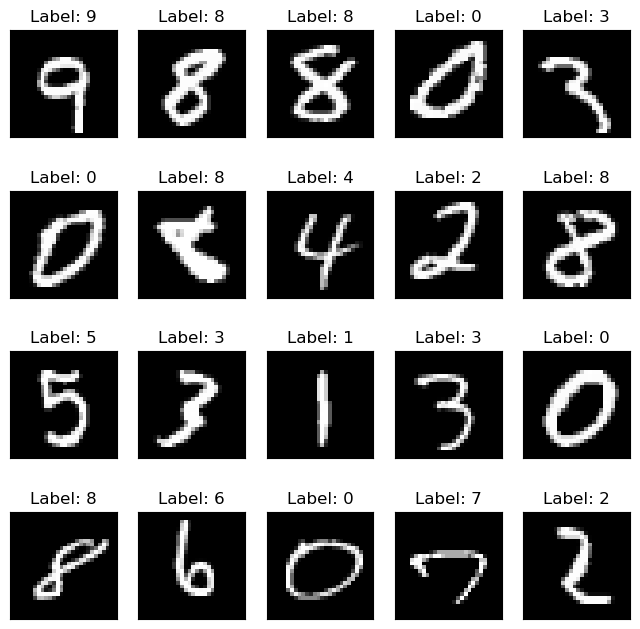

In [9]:
fig, axs = plt.subplots(4, 5, figsize=(8,8))
for ax in axs.flatten():
    img, label = random.choice(train_dataset)
    ax.imshow(np.array(img.permute(1,2,0)), cmap='gist_gray')
    ax.set_title('Label: %d' % label)
    ax.set_xticks([])
    ax.set_yticks([])
#plt.tight_layout()